# Build a list of visible open cluster generate sky trajectories and plot

- Author Sylvie Dagoret-Campagne
- Creation : August 26th 2023
- Update : August 26th 2023 
- Update : August 27th 2023
- Update : August 29th 2023 : Correct a big bug on Longitide angle and ra selection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

from matplotlib.dates import (AutoDateLocator, YearLocator, MonthLocator,
                              DayLocator, WeekdayLocator, HourLocator,
                              MinuteLocator, SecondLocator, MicrosecondLocator,
                              RRuleLocator, rrulewrapper, MONTHLY,
                              MO, TU, WE, TH, FR, SA, SU, DateFormatter,
                              AutoDateFormatter, ConciseDateFormatter)

%matplotlib inline
import pandas as pd

In [2]:
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo,TimeDelta
from astropy.coordinates import Longitude

In [3]:
import datetime as dt
from datetime import datetime
import timezonefinder, pytz
from calendar import monthrange
import calendar

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
from astroquery.simbad import Simbad

In [6]:
# to view the list of VOTABLE
# Simbad.list_votable_fields()

In [7]:
Simbad.add_votable_fields('sptype')
Simbad.add_votable_fields('flux(U)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(B)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(V)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(R)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(I)') # add the Vega unit Magnitude 
#Simbad.add_votable_fields('flux_unit(V)')
#Simbad.add_votable_fields('flux_unit(I)')
#Simbad.add_votable_fields('flux_system(V)')
#Simbad.add_votable_fields('flux_system(I)')
#Simbad.add_votable_fields('ubv')  # Johnson UBV system

In [8]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(12,8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

In [9]:
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo,TimeDelta

## Open Open cluster file

In [10]:
filename = "../../astronomical_data/openclusters_wikipedia.xlsx"
df = pd.read_excel(filename, index_col=None)  

In [11]:
df

,cluster_name,RA,DEC,constellation,distance_pc,age_myr,diameter_arcsec,magV
0,Hyades,04h 26.9m,+15° 52′,Taurus,47.000,625,330',0.50
1,Coma Star Cluster,12h 22.5m,+25° 51′,Coma Berenices,86.000,400-500,120',1.80
2,Trapezium Cluster,5h 35.4m,−05° 27′,Orion,412.000,0.3,0.783',4.00
3,"Messier 6, Butterfly Cluster",17h 40.1m,−32° 13′,Scorpius,487.000,94,20',4.20
4,Messier 7,17h 53.8m,−34° 47′,Scorpius,280.000,224,80',3.30
5,"Messier 11, Wild Duck Cluster",18h 51.1m,−06° 16′,Scutum,1.900,250,13',5.80
6,"Messier 16, Eagle Nebula",18h 18.8m,−13° 49′,Serpens,1.800,1.3,6',6.00
7,Messier 18,18h 20.0m,−17° 06′,Sagittarius,1.296,17,5',6.90
8,Messier 21,18h 04.2m,−22° 29′,Sagittarius,1.205,12,14',5.90
9,Messier 23,17h 57.0m,−18° 59′,Sagittarius,628.000,300,30',5.50


In [12]:
all_ra = []
for index, row in df.iterrows(): 
    angle = Angle(row["RA"])
    all_ra.append(angle)

In [13]:
all_ra_deg = [ ra.degree for ra in all_ra ]

In [14]:
all_dec = []
for index, row in df.iterrows(): 
    angle_str = str(row["DEC"])
    angle_str_stripped = []
    for char in angle_str:
        if char.isalnum():
            angle_str_stripped.append(char)
        else:
            if char == "°":
                angle_str_stripped.append("d")
            elif char == ".":
                angle_str_stripped.append(".")
            elif char == "\'":
                angle_str_stripped.append("m")
    angle_str_stripped.append("m")
    angle_str_keep = "".join(angle_str_stripped)            
    #print(index,angle_str,angle_str_stripped,angle_str_keep)
    angle = Angle(angle_str_keep)
    all_dec.append(angle)

In [15]:
all_dec_deg = [ dec.degree for dec in all_dec ]

In [16]:
df["ra_deg"] = all_ra_deg
df["dec_deg"] = all_dec_deg

## Calculate the Visibility of the object

### Observation date

In [17]:
NYEAR=2023
NMONTH=9
NDAY=12

### Examples from https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html

In [18]:
m33 = SkyCoord.from_name('M33')

In [19]:
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2023-9-12 23:00:00') - utcoffset

In [20]:
m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain))
print(f"M33's Altitude = {m33altaz.alt:.2}")

M33's Altitude = 4.1e+01 deg


## My Location

In summer the UTC offset at my location is + 2 H

In [21]:
mylat = 48.8534
mylong = 2.3488

In [22]:
paris = EarthLocation(lat=mylat*u.deg, lon=mylong*u.deg, height=0*u.m)
utcoffset = 2*u.hour  # CET
time = Time('2023-9-12 23:00:00') - utcoffset

In [23]:
tf = timezonefinder.TimezoneFinder()
mytimezone_str = tf.certain_timezone_at(lat=mylat, lng=mylong)

In [24]:
mytimezone_str

'Europe/Paris'

In [25]:
if mytimezone_str is None:
    print("Could not determine my time zone")
else:
    # Display the current time in that time zone
    
    
    timezone = pytz.timezone(mytimezone_str)
    timezone0 = pytz.timezone('UTC')
    
    dt = datetime.utcnow()
    timeParis_now = datetime.now(timezone)
    
    print("The UTC Time now %s" % dt)
    print("The actual time in %s is %s" % (mytimezone_str, dt + timezone.utcoffset(dt)))

The UTC Time now 2023-08-29 09:47:12.882136
The actual time in Europe/Paris is 2023-08-29 11:47:12.882136


### For LSST

### Observation location

In [26]:
LSSTNAME='Cerro Pachon'
lsst_location=EarthLocation.of_site(LSSTNAME)
longitude=lsst_location.lon
latitude=lsst_location.lat
altitude=lsst_location.height

In [27]:
cerro_pachon = EarthLocation(lat=latitude.degree*u.deg, lon=longitude.degree*u.deg, height=altitude)

### Determination of UTC offset from TimeZone in Chile

In [28]:
tf = timezonefinder.TimezoneFinder()
timezone_str = tf.certain_timezone_at(lat=latitude.degree, lng=longitude.degree)

In [29]:
print(f"Time zone at Rubin LSST Observatory: {timezone_str}")

Time zone at Rubin LSST Observatory: America/Santiago


In [30]:
if timezone_str is None:
    print("Could not determine the time zone")
else:
    # Display the current time in that time zone
    
    #tz = pytz.timezone('Europe/Berlin')
    #berlin_now = datetime.now(tz)
    
    timezone = pytz.timezone(timezone_str)
    timezone0 = pytz.timezone('UTC')
    
    dt = datetime.utcnow()
    timeChile_now = datetime.now(timezone)
    
    print("The UTC Time now %s" % dt)
    print("The actual time in %s is %s" % (timezone_str, dt + timezone.utcoffset(dt)))

The UTC Time now 2023-08-29 09:47:13.248695
The actual time in America/Santiago is 2023-08-29 05:47:13.248695


In [31]:
utcoffset=timezone.utcoffset(dt).total_seconds()/60./60.
print("The UTC offset in Chile is ",utcoffset," hours")

The UTC offset in Chile is  -4.0  hours


In [32]:
tz_utc_minus_xx_hours = TimezoneInfo(utc_offset=int(utcoffset)*u.hour)
tz_utc_minus_xx_hours

In [33]:
timezone.utcoffset

<bound method DstTzInfo.utcoffset of <DstTzInfo 'America/Santiago' LMT-1 day, 19:17:00 STD>>

### Night of observation

In [34]:
night_obs = datetime(NYEAR, NMONTH, NDAY, 0, 0)
night_obs_midnight= datetime(NYEAR, NMONTH, NDAY, 23, 59,59,tzinfo = tz_utc_minus_xx_hours)

In [35]:
night_obs_str=night_obs.strftime("%Y-%m-%d %H:%M:%S")
print(f"Night of Observation : {night_obs_str}")

Night of Observation : 2023-09-12 00:00:00


In [36]:
night_obs_midnight_str=night_obs_midnight.strftime("%Y-%m-%d %H:%M:%S")
night_obs_midnight_str
print(f"Midnight of Night of Observation : {night_obs_midnight_str}")

Midnight of Night of Observation : 2023-09-12 23:59:59


### Compute UTC and Sideral Time at local midnight

In [37]:
tz_utc = TimezoneInfo() 
print("Local time in Santiago in summer (GMT-4) in summer : ",night_obs_midnight)
print("Time in UTC                               : ",night_obs_midnight.astimezone(tz_utc))

Local time in Santiago in summer (GMT-4) in summer :  2023-09-12 23:59:59-04:00
Time in UTC                               :  2023-09-13 03:59:59+00:00


### Sideral time at LSST site midnight

In [38]:
t_lsst = Time(night_obs_midnight.astimezone(tz_utc), scale='utc',location=lsst_location)
t_sidereal_lsst = t_lsst.sidereal_time('apparent')  
print("Sideral Time at LSST midnight:",t_sidereal_lsst)

Sideral Time at LSST midnight: 22h44m36.72873971s


In [39]:
print("Sideral Time angle at LSST midnight:",Angle(t_sidereal_lsst).to(u.degree))

Sideral Time angle at LSST midnight: 341d09m10.93109565s


In [40]:
print("Sideral Time angle at LSST midnight:",Angle(t_sidereal_lsst).degree)

Sideral Time angle at LSST midnight: 341.153036415458


In [41]:
# To check
t_lsst_2 = Time('2023-09-13 03:59:59', scale='utc',location=('-70.73668333d', '-30.24074167d'))
t_lsst_2.sidereal_time('apparent') 

<Longitude 22.74353576 hourangle>

## Filter Obervable targets according RA and magnitude and culmination angle

- Select the target which Right-Asccention is +/- 6 hours from the sideral time

- The culmination Hour angle at the meridian must not be less than -6H to + 6H

### Criteria on Margin Angle

In [42]:
MarginAngle = Angle(6.0,u.hour)
MarginAngle

<Angle 6. hourangle>

In [43]:
#calculate tdege range of RA target to be visible within the MarginAngle
ra_min = Longitude((t_sidereal_lsst - MarginAngle).degree,unit=u.deg)
ra_max = Longitude((t_sidereal_lsst + MarginAngle).degree,unit=u.deg)

In [44]:
ra_min

<Longitude 251.15303642 deg>

In [45]:
ra_max

<Longitude 71.15303642 deg>

In [46]:
ra_max

<Longitude 71.15303642 deg>

In [47]:
ra_min_angle = Longitude(ra_min,u.degree)
ra_max_angle = Longitude(ra_max,u.degree)

In [48]:
ra_min_angle.wrap_angle = 180 * u.deg
ra_max_angle.wrap_angle = 180 * u.deg

In [49]:
ra_min_angle.degree

-108.84696358454198

In [50]:
ra_max_angle.degree

71.15303641545796

### Criteria on culmination angle

In [51]:
culmin_angle_min = 40

### Criteria on magnitude in V

In [52]:
magLim = 12.

In [53]:
latitude

<Latitude -30.24074167 deg>

In [54]:
all_flag_select = []

# numeric collections
all_ra_angles_deg = []
all_dec_angles_deg = []
all_altmax_angle_deg = []
all_zenithmin_angle_deg = []
all_magV = []

# loop on rach entries in the df table to calculate angles

for index, row in df.iterrows(): 
    target_name = row["cluster_name"]
   
    # compute numeric values for ra-dec
    ra_angle = Longitude(row['ra_deg'],unit = u.deg) 
    ra_angle.wrap_angle = 180 * u.deg
    
    
    dec_angle = Angle(row["dec_deg"],unit = u.deg) 
    
    #ra_angle = all_ra[index] # already an astropy Angle
    #dec_angle = all_dec[index] # already an anstropy Angle
    
    # compute culmination angle
    if latitude.deg >= 0:
        if dec_angle.deg >= latitude.deg:
            zenith_angle =   dec_angle - latitude
        else:
            zenith_angle = latitude - dec_angle
    else:
        if dec_angle.deg < latitude.deg :
            zenith_angle =   latitude - dec_angle 
        else:
            zenith_angle =   dec_angle - latitude 
        
        
    
    
    culmination_angle = Angle(90.0, unit = u.deg) - zenith_angle
    
   
    magV = row["magV"]
    
            
             
    all_ra_angles_deg.append(ra_angle.degree)
    all_dec_angles_deg.append(dec_angle.degree)
    all_altmax_angle_deg.append(culmination_angle.degree) 
    all_zenithmin_angle_deg.append(zenith_angle.degree )
    all_magV.append(magV)
  
    
    flag1 = ra_angle.is_within_bounds(ra_min_angle,ra_max_angle)
    flag2 = (magV < magLim)
    flag3 = False
    
    if culmination_angle.degree > culmin_angle_min :
        flag3 = True
    
    flag = flag1 & flag2 & flag3
    
 
    if flag:
        print(f"{index}, {target_name} , RA = {ra_angle.hour:.2f} , DEC = {dec_angle.degree:.2f} , RA-MIN-MAX = {ra_min_angle.deg:.1f}-{ra_max_angle.deg:.1f},zenith_angle = {zenith_angle.degree:.2f}  culmination angle = {culmination_angle.degree:.2f} , magV = {magV} , flag_select = {flag}")
   
    all_flag_select.append(flag)                

0, Hyades , RA = 4.45 , DEC = 15.87 , RA-MIN-MAX = -108.8-71.2,zenith_angle = 46.11  culmination angle = 43.89 , magV = 0.5 , flag_select = True
5, Messier 11, Wild Duck Cluster , RA = -5.15 , DEC = 6.27 , RA-MIN-MAX = -108.8-71.2,zenith_angle = 36.51  culmination angle = 53.49 , magV = 5.8 , flag_select = True
6, Messier 16, Eagle Nebula , RA = -5.69 , DEC = 13.82 , RA-MIN-MAX = -108.8-71.2,zenith_angle = 44.06  culmination angle = 45.94 , magV = 6.0 , flag_select = True
7, Messier 18 , RA = -5.67 , DEC = 17.10 , RA-MIN-MAX = -108.8-71.2,zenith_angle = 47.34  culmination angle = 42.66 , magV = 6.9 , flag_select = True
9, Messier 23 , RA = -6.05 , DEC = 18.98 , RA-MIN-MAX = -108.8-71.2,zenith_angle = 49.22  culmination angle = 40.78 , magV = 5.5 , flag_select = True
10, Messier 24 , RA = -5.72 , DEC = 18.48 , RA-MIN-MAX = -108.8-71.2,zenith_angle = 48.72  culmination angle = 41.28 , magV = 2.5 , flag_select = True
11, Messier 25 , RA = -5.47 , DEC = 19.12 , RA-MIN-MAX = -108.8-71.2,zen

In [55]:
ra_min_angle

<Longitude -108.84696358 deg>

In [56]:
ra_max_angle

<Longitude 71.15303642 deg>

In [57]:
ra_angle= Longitude(31.122660,unit=u.deg)
ra_angle.wrap_at = 180.0*u.deg
ra_angle.is_within_bounds(ra_min_angle,ra_max_angle)

True

## Add calculated numerical values to the pandas table

In [58]:
df["ra_deg"] = all_ra_angles_deg
df["dec_deg"] = all_dec_angles_deg 
df["alt_max"] = all_altmax_angle_deg
df["zenith_min"] = all_zenithmin_angle_deg
df["magV"] = all_magV 

### Example for debug

In [59]:
cut = df["cluster_name"] == "NGC 6633"

In [60]:
df[cut]

,cluster_name,RA,DEC,constellation,distance_pc,age_myr,diameter_arcsec,magV,ra_deg,dec_deg,alt_max,zenith_min
46,NGC 6633,18h 27.7m,+06° 34′,Ophiuchus,375.0,660,20',4.6,-83.075,6.566667,53.192592,36.807408


## Apply selection cut

In [61]:
df["select"] = all_flag_select
cut = df["select"] == True

t=df[cut]
NTargets=len(t)

In [62]:
t

,cluster_name,RA,DEC,constellation,distance_pc,age_myr,diameter_arcsec,magV,ra_deg,dec_deg,alt_max,zenith_min,select
0,Hyades,04h 26.9m,+15° 52′,Taurus,47.000,625,330',0.5,66.725,15.866667,43.892592,46.107408,True
5,"Messier 11, Wild Duck Cluster",18h 51.1m,−06° 16′,Scutum,1.900,250,13',5.8,-77.225,6.266667,53.492592,36.507408,True
6,"Messier 16, Eagle Nebula",18h 18.8m,−13° 49′,Serpens,1.800,1.3,6',6.0,-85.300,13.816667,45.942592,44.057408,True
7,Messier 18,18h 20.0m,−17° 06′,Sagittarius,1.296,17,5',6.9,-85.000,17.100000,42.659258,47.340742,True
9,Messier 23,17h 57.0m,−18° 59′,Sagittarius,628.000,300,30',5.5,-90.750,18.983333,40.775925,49.224075,True
10,Messier 24,18h 17.0m,−18° 29′,Sagittarius,3.070,220,90',2.5,-85.750,18.483333,41.275925,48.724075,True
11,Messier 25,18h 31.7m,−19° 07′,Sagittarius,620.000,92,30',4.6,-82.075,19.116667,40.642592,49.357408,True
12,Messier 26,18h 45.3m,−09° 23′,Scutum,1.600,85,7',8.0,-78.675,9.383333,50.375925,39.624075,True
39,Melotte 186,18h 01.1m,+02° 54′,Ophiuchus,200.000,100,240',3.0,-89.725,2.900000,56.859258,33.140742,True
42,IC 4756,18h 39.0m,−05° 27′,Serpens,330.000,500,40',4.6,-80.250,5.450000,54.309258,35.690742,True


### Must reindex the table

In [63]:
t = t.reset_index(drop=True)

In [64]:
t

,cluster_name,RA,DEC,constellation,distance_pc,age_myr,diameter_arcsec,magV,ra_deg,dec_deg,alt_max,zenith_min,select
0,Hyades,04h 26.9m,+15° 52′,Taurus,47.000,625,330',0.5,66.725,15.866667,43.892592,46.107408,True
1,"Messier 11, Wild Duck Cluster",18h 51.1m,−06° 16′,Scutum,1.900,250,13',5.8,-77.225,6.266667,53.492592,36.507408,True
2,"Messier 16, Eagle Nebula",18h 18.8m,−13° 49′,Serpens,1.800,1.3,6',6.0,-85.300,13.816667,45.942592,44.057408,True
3,Messier 18,18h 20.0m,−17° 06′,Sagittarius,1.296,17,5',6.9,-85.000,17.100000,42.659258,47.340742,True
4,Messier 23,17h 57.0m,−18° 59′,Sagittarius,628.000,300,30',5.5,-90.750,18.983333,40.775925,49.224075,True
5,Messier 24,18h 17.0m,−18° 29′,Sagittarius,3.070,220,90',2.5,-85.750,18.483333,41.275925,48.724075,True
6,Messier 25,18h 31.7m,−19° 07′,Sagittarius,620.000,92,30',4.6,-82.075,19.116667,40.642592,49.357408,True
7,Messier 26,18h 45.3m,−09° 23′,Scutum,1.600,85,7',8.0,-78.675,9.383333,50.375925,39.624075,True
8,Melotte 186,18h 01.1m,+02° 54′,Ophiuchus,200.000,100,240',3.0,-89.725,2.900000,56.859258,33.140742,True
9,IC 4756,18h 39.0m,−05° 27′,Serpens,330.000,500,40',4.6,-80.250,5.450000,54.309258,35.690742,True


In [65]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTargets)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTargets), alpha=1)

## Compute Target location before computing their sky trajectory

In [66]:
all_target_names = t["cluster_name"]
print("order in selected target location")
print(all_target_names)
#selected_target_locations = [ SkyCoord.from_name(target_name) for target_name in all_target_names]
selected_target_locations = []
for index, row in t.iterrows(): 
    coord = SkyCoord(row['ra_deg'],row['dec_deg'],unit = "deg")
    selected_target_locations.append(coord)
    

order in selected target location
0                            Hyades
1     Messier 11, Wild Duck Cluster
2          Messier 16, Eagle Nebula
3                        Messier 18
4                        Messier 23
5                        Messier 24
6                        Messier 25
7                        Messier 26
8                       Melotte 186
9                           IC 4756
10                          IC 4665
11                         NGC 6633
12                         NGC 6756
Name: cluster_name, dtype: object


In [67]:
all_ra_astroquery=[]
all_dec_astroquery=[]
for target_loc in selected_target_locations:
    all_ra_astroquery.append(target_loc.ra)
    all_dec_astroquery.append(target_loc.dec)

## Compute target tag

- the legend in the plot

In [68]:
all_target_tagnames = []
for index, row in t.iterrows(): 
    tagname =  row['cluster_name'] + ", m = " +  str(row["magV"]) + " mag, fov = " + row['diameter_arcsec']  
    all_target_tagnames.append(tagname)

In [69]:
all_target_tagnames

["Hyades, m = 0.5 mag, fov = 330'",
 "Messier 11, Wild Duck Cluster, m = 5.8 mag, fov = 13'",
 "Messier 16, Eagle Nebula, m = 6.0 mag, fov = 6'",
 "Messier 18, m = 6.9 mag, fov = 5'",
 "Messier 23, m = 5.5 mag, fov = 30'",
 "Messier 24, m = 2.5 mag, fov = 90'",
 "Messier 25, m = 4.6 mag, fov = 30'",
 "Messier 26, m = 8.0 mag, fov = 7'",
 "Melotte 186, m = 3.0 mag, fov = 240'",
 "IC 4756, m = 4.6 mag, fov = 40'",
 "IC 4665, m = 4.2 mag, fov = 70'",
 "NGC 6633, m = 4.6 mag, fov = 20'",
 "NGC 6756, m = 4.5 mag, fov = 4'"]

In [70]:
t["tag"] = all_target_tagnames

# Astronomical in Observation frame for each selected target

## Initialisation 

In [71]:
midnight_utc = Time(night_obs_midnight_str) - utcoffset*u.hour
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
sideral_times = Angle(t_sidereal_lsst) + Angle(delta_midnight)
times_evening_to_morning = midnight_utc + delta_midnight
frame_evening_to_morning = AltAz(obstime=times_evening_to_morning, location=cerro_pachon)

In [72]:
times_evening_to_morning_datetime = times_evening_to_morning.to_datetime()

## Sun frame

In [73]:
from astropy.coordinates import get_sun
sunaltazs_evening_to_morning = get_sun(times_evening_to_morning).transform_to(frame_evening_to_morning)

## Moon frame

In [74]:
from astropy.coordinates import get_moon
moon_evening_to_morning = get_moon(times_evening_to_morning)
moonaltazs_evening_to_morning = moon_evening_to_morning.transform_to(frame_evening_to_morning)

## Targets Frame

In [75]:
all_target_altazs_evening_to_morning = [target_location.transform_to(frame_evening_to_morning) for target_location in  selected_target_locations ]

## Distance to the moon

In [76]:
all_target_distancetomoon_evening_to_morning = [] 

num_target=0
for idx,targetcoordinateseries in enumerate(all_target_altazs_evening_to_morning): 
    N_coord = len(targetcoordinateseries)
    idx_coord = 0
    all_distances_sep = []
    for idx_coord in range(N_coord):
        distance_sep=targetcoordinateseries[idx_coord].separation(moonaltazs_evening_to_morning[idx_coord])
        all_distances_sep.append(distance_sep.degree)
    all_distances_sep= np.array(all_distances_sep)
    all_distances_sep_min = all_distances_sep.min()
    all_target_distancetomoon_evening_to_morning.append(all_distances_sep_min) 
    all_target_tagnames[idx] += f", d_m = {all_distances_sep_min:.0f}°"
    num_target+=1

In [77]:
all_target_tagnames

["Hyades, m = 0.5 mag, fov = 330', d_m = 76°",
 "Messier 11, Wild Duck Cluster, m = 5.8 mag, fov = 13', d_m = 121°",
 "Messier 16, Eagle Nebula, m = 6.0 mag, fov = 6', d_m = 111°",
 "Messier 18, m = 6.9 mag, fov = 5', d_m = 110°",
 "Messier 23, m = 5.5 mag, fov = 30', d_m = 104°",
 "Messier 24, m = 2.5 mag, fov = 90', d_m = 109°",
 "Messier 25, m = 4.6 mag, fov = 30', d_m = 112°",
 "Messier 26, m = 8.0 mag, fov = 7', d_m = 119°",
 "Melotte 186, m = 3.0 mag, fov = 240', d_m = 111°",
 "IC 4756, m = 4.6 mag, fov = 40', d_m = 119°",
 "IC 4665, m = 4.2 mag, fov = 70', d_m = 106°",
 "NGC 6633, m = 4.6 mag, fov = 20', d_m = 116°",
 "NGC 6756, m = 4.5 mag, fov = 4', d_m = 126°"]

### Update target tag

In [78]:
t["tag"] = all_target_tagnames

In [79]:
t

,cluster_name,RA,DEC,constellation,distance_pc,age_myr,diameter_arcsec,magV,ra_deg,dec_deg,alt_max,zenith_min,select,tag
0,Hyades,04h 26.9m,+15° 52′,Taurus,47.000,625,330',0.5,66.725,15.866667,43.892592,46.107408,True,"Hyades, m = 0.5 mag, fov = 330', d_m = 76°"
1,"Messier 11, Wild Duck Cluster",18h 51.1m,−06° 16′,Scutum,1.900,250,13',5.8,-77.225,6.266667,53.492592,36.507408,True,"Messier 11, Wild Duck Cluster, m = 5.8 mag, fo..."
2,"Messier 16, Eagle Nebula",18h 18.8m,−13° 49′,Serpens,1.800,1.3,6',6.0,-85.300,13.816667,45.942592,44.057408,True,"Messier 16, Eagle Nebula, m = 6.0 mag, fov = 6..."
3,Messier 18,18h 20.0m,−17° 06′,Sagittarius,1.296,17,5',6.9,-85.000,17.100000,42.659258,47.340742,True,"Messier 18, m = 6.9 mag, fov = 5', d_m = 110°"
4,Messier 23,17h 57.0m,−18° 59′,Sagittarius,628.000,300,30',5.5,-90.750,18.983333,40.775925,49.224075,True,"Messier 23, m = 5.5 mag, fov = 30', d_m = 104°"
5,Messier 24,18h 17.0m,−18° 29′,Sagittarius,3.070,220,90',2.5,-85.750,18.483333,41.275925,48.724075,True,"Messier 24, m = 2.5 mag, fov = 90', d_m = 109°"
6,Messier 25,18h 31.7m,−19° 07′,Sagittarius,620.000,92,30',4.6,-82.075,19.116667,40.642592,49.357408,True,"Messier 25, m = 4.6 mag, fov = 30', d_m = 112°"
7,Messier 26,18h 45.3m,−09° 23′,Scutum,1.600,85,7',8.0,-78.675,9.383333,50.375925,39.624075,True,"Messier 26, m = 8.0 mag, fov = 7', d_m = 119°"
8,Melotte 186,18h 01.1m,+02° 54′,Ophiuchus,200.000,100,240',3.0,-89.725,2.900000,56.859258,33.140742,True,"Melotte 186, m = 3.0 mag, fov = 240', d_m = 111°"
9,IC 4756,18h 39.0m,−05° 27′,Serpens,330.000,500,40',4.6,-80.250,5.450000,54.309258,35.690742,True,"IC 4756, m = 4.6 mag, fov = 40', d_m = 119°"


## Sort target according increasing max culminating time

In [80]:
all_timemax=np.zeros(NTargets)
all_altitudesmax=np.zeros(NTargets)
for idx in np.arange(NTargets):
    altitudes=all_target_altazs_evening_to_morning[idx].alt
    idx_max=np.where(altitudes==altitudes.max())[0][0]
    all_timemax[idx]=delta_midnight[idx_max].value
    all_altitudesmax[idx]=altitudes.max().degree

In [81]:
all_altitudesmax

array([43.83818479, 53.46292313, 45.93055935, 42.64644291, 40.77606774,
       41.2647472 , 40.62296046, 50.34925279, 56.85831419, 54.28632206,
       54.0499082 , 53.17588401, 55.02005362])

In [82]:
t["tmax"] = all_timemax

In [83]:
all_timemax

array([ 5.70570571, -3.85585586, -4.40840841, -4.38438438, -4.76876877,
       -4.43243243, -4.19219219, -3.95195195, -4.6966967 , -4.07207207,
       -4.93693694, -4.24024024, -3.56756757])

In [84]:
rank = np.argsort(all_timemax)
rank

array([10,  4,  8,  5,  2,  3, 11,  6,  9,  7,  1, 12,  0])

In [85]:
rankinv = np.argsort(rank)
rankinv

array([12, 10,  4,  5,  1,  3,  7,  9,  2,  8,  0,  6, 11])

In [86]:
#t.index[rank]

In [87]:
t["rank_tmax"] = rankinv # rank in time
t["rank_num"] = np.arange(NTargets) # rank in original table

In [88]:
#t = t.sort_values(by = ['tmax'])

### Must reindex dataframe for loop on targets (in sorting order)

In [89]:
#t.reset_index(inplace=True)

In [90]:
t

,cluster_name,RA,DEC,constellation,distance_pc,age_myr,diameter_arcsec,magV,ra_deg,dec_deg,alt_max,zenith_min,select,tag,tmax,rank_tmax,rank_num
0,Hyades,04h 26.9m,+15° 52′,Taurus,47.000,625,330',0.5,66.725,15.866667,43.892592,46.107408,True,"Hyades, m = 0.5 mag, fov = 330', d_m = 76°",5.705706,12,0
1,"Messier 11, Wild Duck Cluster",18h 51.1m,−06° 16′,Scutum,1.900,250,13',5.8,-77.225,6.266667,53.492592,36.507408,True,"Messier 11, Wild Duck Cluster, m = 5.8 mag, fo...",-3.855856,10,1
2,"Messier 16, Eagle Nebula",18h 18.8m,−13° 49′,Serpens,1.800,1.3,6',6.0,-85.300,13.816667,45.942592,44.057408,True,"Messier 16, Eagle Nebula, m = 6.0 mag, fov = 6...",-4.408408,4,2
3,Messier 18,18h 20.0m,−17° 06′,Sagittarius,1.296,17,5',6.9,-85.000,17.100000,42.659258,47.340742,True,"Messier 18, m = 6.9 mag, fov = 5', d_m = 110°",-4.384384,5,3
4,Messier 23,17h 57.0m,−18° 59′,Sagittarius,628.000,300,30',5.5,-90.750,18.983333,40.775925,49.224075,True,"Messier 23, m = 5.5 mag, fov = 30', d_m = 104°",-4.768769,1,4
5,Messier 24,18h 17.0m,−18° 29′,Sagittarius,3.070,220,90',2.5,-85.750,18.483333,41.275925,48.724075,True,"Messier 24, m = 2.5 mag, fov = 90', d_m = 109°",-4.432432,3,5
6,Messier 25,18h 31.7m,−19° 07′,Sagittarius,620.000,92,30',4.6,-82.075,19.116667,40.642592,49.357408,True,"Messier 25, m = 4.6 mag, fov = 30', d_m = 112°",-4.192192,7,6
7,Messier 26,18h 45.3m,−09° 23′,Scutum,1.600,85,7',8.0,-78.675,9.383333,50.375925,39.624075,True,"Messier 26, m = 8.0 mag, fov = 7', d_m = 119°",-3.951952,9,7
8,Melotte 186,18h 01.1m,+02° 54′,Ophiuchus,200.000,100,240',3.0,-89.725,2.900000,56.859258,33.140742,True,"Melotte 186, m = 3.0 mag, fov = 240', d_m = 111°",-4.696697,2,8
9,IC 4756,18h 39.0m,−05° 27′,Serpens,330.000,500,40',4.6,-80.250,5.450000,54.309258,35.690742,True,"IC 4756, m = 4.6 mag, fov = 40', d_m = 119°",-4.072072,8,9


# Plot

In [91]:
all_target_names = t["cluster_name"].values
all_target_names

array(['Hyades', 'Messier 11, Wild Duck Cluster',
       'Messier 16, Eagle Nebula', 'Messier 18', 'Messier 23',
       'Messier 24', 'Messier 25', 'Messier 26', 'Melotte 186', 'IC 4756',
       'IC 4665', 'NGC 6633', 'NGC 6756'], dtype=object)

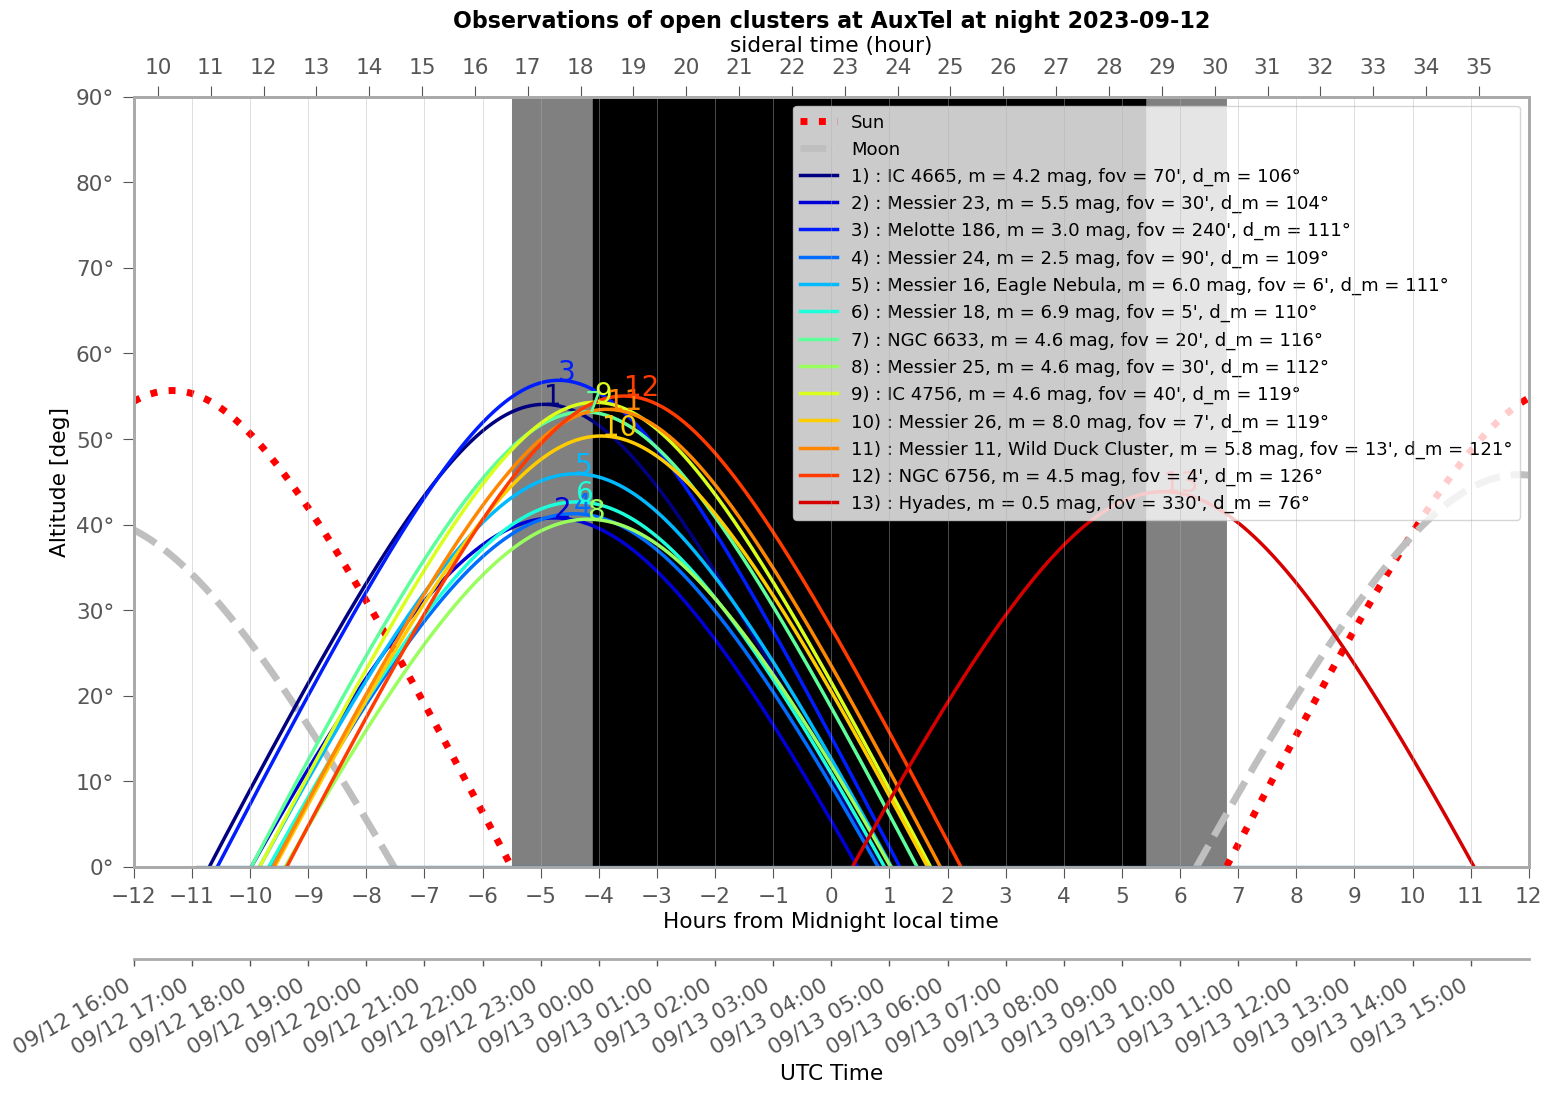

In [92]:
fig = plt.figure(figsize=(18,10))


# First Axis : target sky trajectories
# ====================================
ax=fig.add_subplot(1,1,1)

# plot sun
ax.plot(delta_midnight, sunaltazs_evening_to_morning.alt, color='r', ls=":",label='Sun',lw=5)
#plot moon
ax.plot(delta_midnight, moonaltazs_evening_to_morning.alt, color=[0.75]*3, ls='--', label='Moon',lw=5)


# loop on selected targets in pandas dataframe t according rank order
for index in range(NTargets):
    
    # select the good row in pandas dataframe from time ordering
    row = (t[t["rank_tmax"] == index]).iloc[0]
    

    # get its tag
    label = str(index+1) + ") : " + row["tag"]
    
    # rank in all_target_altazs_evening_to_morning table
    rank_num = row["rank_num"]
    tmax = row["tmax"]
    altmax = row["alt_max"]
    
    
  
    # plot trajectory
    ax.plot(delta_midnight, all_target_altazs_evening_to_morning[rank_num].alt,label=label, lw=2.5,color=all_colors[index])

    # plot label
    if all_target_altazs_evening_to_morning[rank_num].alt[-1]>0:
        ax.text(delta_midnight[-1], all_target_altazs_evening_to_morning[rank_num].alt[-1], f'{index+1}',color=all_colors[index],fontsize=20)
    if all_target_altazs_evening_to_morning[rank_num].alt[0]>0:
        ax.text(delta_midnight[0], all_target_altazs_evening_to_morning[rank_num].alt[0], f'{index+1}',color=all_colors[index],fontsize=20)
    if altmax>0 :
        ax.text(tmax, altmax, f'{index+1}',color=all_colors[index],fontsize=20)
    


ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,sunaltazs_evening_to_morning.alt < -0*u.deg, color='0.5', zorder=0)
ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,sunaltazs_evening_to_morning.alt < -18*u.deg, color='k', zorder=0)

ax.legend(loc='upper right')
ax.set_xlim(-12*u.hour, 12*u.hour)
ax.set_xticks((np.arange(13)*2-12)*u.hour)
ax.set_ylim(0*u.deg, 90*u.deg)
ax.set_xlabel('Hours from Midnight local time')
ax.set_ylabel('Altitude [deg]')
ax.grid(None)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
title = "Observations of open clusters at AuxTel at night " + night_obs_str.split(" ")[0]
ax.set_title(title)
#for label in ax.get_xticklabels(which='major'):
#    label.set(rotation=30, horizontalalignment='right')


# second horizontal axis : Sideral time axis
# ==========================================
ax2 = ax.twiny()
ax2.plot([sideral_times[0].hour,sideral_times[-1].hour],[0,0])
ax2.set_xlabel("sideral time (hour)")
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.grid(None)

# third horizontal axis : UTC time axis
# =====================================

ax3 = ax.twiny()
# Move twinned axis ticks and label from top to bottom
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
offset = -0.12
ax3.spines["bottom"].set_position(("axes", offset))

ax3.set_frame_on(True)
ax3.patch.set_visible(False) # mandatory
for sp in ax3.spines.values():
    sp.set_visible(False)
ax3.spines["bottom"].set_visible(True)
fmt = '%m/%d %H:%M'
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(fmt))
ax3.xaxis.set_major_locator(mdates.HourLocator(interval=1))

curvetoremove, = ax3.plot_date(times_evening_to_morning_datetime, sunaltazs_evening_to_morning.alt, color='r', ls=":",lw=0)
curvetoremove.remove()
ax3.set_xlim(times_evening_to_morning_datetime[0], times_evening_to_morning_datetime[-1])



ax3.tick_params(which='major', width=1.00, length=5)
ax3.tick_params(which='minor', width=0.75, length=2.5)
ax3.grid(True)
#plt.gcf().autofmt_xdate()  # orient date labels at a slant
# slant for this axis
for label in ax3.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

ax3.set_xlabel("UTC Time")


figname="AuxtelStarAlt_visibleOpenClusters{:4d}_{:d}_{:d}.png".format(NYEAR,NMONTH,NDAY)

plt.savefig(figname)
plt.show()

# To plot in staralt

https://www.ing.iac.es//Astronomy/telescopes/wht/catformat.html

In [93]:
t_staralt = t[["cluster_name","RA","DEC","rank_tmax"]]
t_staralt["equinox"] = np.full(NTargets,"J2000")
t_staralt = t_staralt.sort_values(by = ['rank_tmax'])
t_staralt = t_staralt.drop(['rank_tmax'], axis=1)

/var/folders/cq/vms8st5136z3q5xx4rd9xqfr0000gw/T/ipykernel_16864/24930692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_staralt["equinox"] = np.full(NTargets,"J2000")


In [94]:
t_staralt

,cluster_name,RA,DEC,equinox
10,IC 4665,17h 46.3m,+05° 43′,J2000
4,Messier 23,17h 57.0m,−18° 59′,J2000
8,Melotte 186,18h 01.1m,+02° 54′,J2000
5,Messier 24,18h 17.0m,−18° 29′,J2000
2,"Messier 16, Eagle Nebula",18h 18.8m,−13° 49′,J2000
3,Messier 18,18h 20.0m,−17° 06′,J2000
11,NGC 6633,18h 27.7m,+06° 34′,J2000
6,Messier 25,18h 31.7m,−19° 07′,J2000
9,IC 4756,18h 39.0m,−05° 27′,J2000
7,Messier 26,18h 45.3m,−09° 23′,J2000


In [95]:
t_staralt.to_csv("staralt_opencluster.csv",index=False,header=False, sep = " ")

In [96]:
! cat staralt_opencluster.csv

"IC 4665" "17h 46.3m " +05° 43′ J2000
"Messier 23" "17h 57.0m " −18° 59′ J2000
"Melotte 186" "18h 01.1m " +02° 54′ J2000
"Messier 24" "18h 17.0m " −18° 29′ J2000
"Messier 16, Eagle Nebula" "18h 18.8m " −13° 49′ J2000
"Messier 18" "18h 20.0m " −17° 06′ J2000
"NGC 6633" "18h 27.7m " +06° 34′ J2000
"Messier 25" "18h 31.7m " −19° 07′ J2000
"IC 4756" "18h 39.0m " −05° 27′ J2000
"Messier 26" "18h 45.3m " −09° 23′ J2000
"Messier 11, Wild Duck Cluster" "18h 51.1m " −06° 16′ J2000
"NGC 6756" "19h 08.7m " +04° 42′ J2000
Hyades "04h 26.9m " +15° 52′ J2000


# Spheric plot

In [97]:
def makePolarPlot(azimuthsInDegrees, zenithAngles, marker=".",ax=None,
                       title=None, color=None, objName=None,lw=0.5):
    if ax==None:
        _ = plt.figure(figsize=(20, 10))
        ax = plt.subplot(111, polar=True)
        
    ax.plot([a*np.pi/180 for a in azimuthsInDegrees], zenithAngles, marker, c=color, label=objName,lw=lw)
    if title:
        ax.set_title(title, va='bottom')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlim(0, 90)
    return ax

In [98]:
darkTimeIndex=[sunaltazs_evening_to_morning.alt < -18*u.deg]

/var/folders/cq/vms8st5136z3q5xx4rd9xqfr0000gw/T/ipykernel_16864/3706501127.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  moon_azimuthsInDegreesNight=moon_azimuthsInDegrees[darkTimeIndex]
/var/folders/cq/vms8st5136z3q5xx4rd9xqfr0000gw/T/ipykernel_16864/3706501127.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  moon_zenithAnglesNight=moon_zenithAngles[darkTimeIndex]
/var/folders/cq/vms8st5136z3q5xx4rd9xqfr0000gw/T/ipykernel_16864/3706501127.py:44: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprec

Text(0.5, 1.0, 'Observations of open clusters at AuxTel at night 2023-09-12')

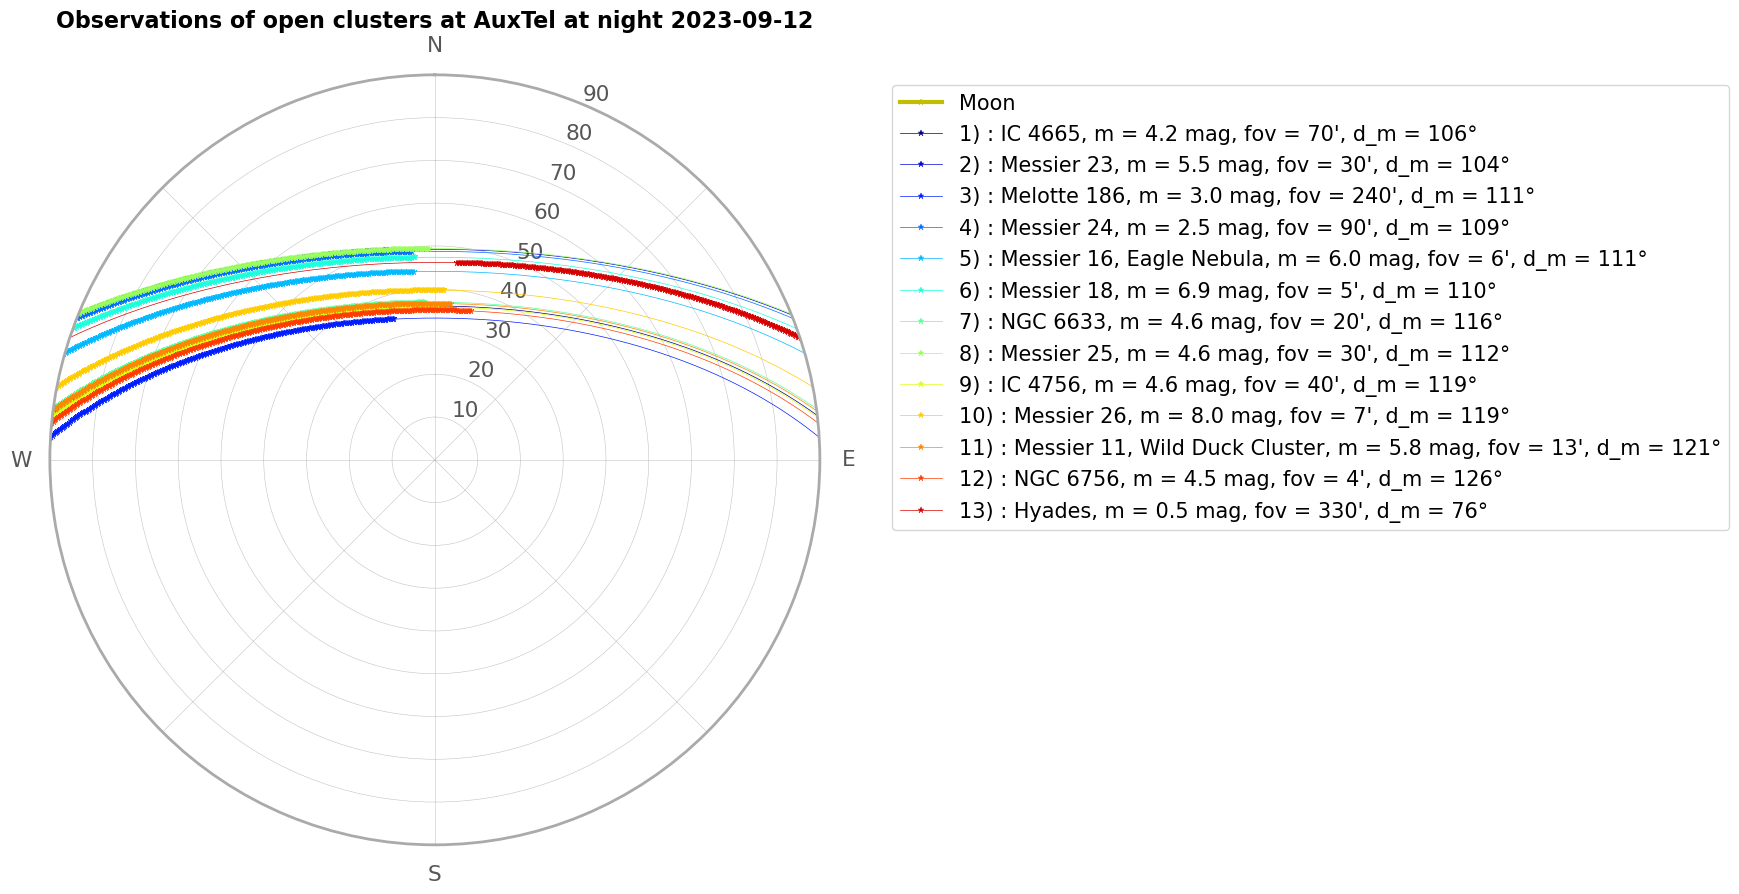

In [99]:
_ = plt.figure(figsize=(20, 10))

ax = plt.subplot(111, polar=True)


darkTimeIndex=[sunaltazs_evening_to_morning.alt < -18*u.deg]

# compute zenith and azimuth angles
moon_azimuthsInDegrees = Angle(moonaltazs_evening_to_morning.az).deg
moon_zenithAngles = Angle(moonaltazs_evening_to_morning.zen).deg

#ax=makePolarPlot(moon_azimuthsInDegrees, moon_zenithAngles,ax=ax, marker="--",color="y", title = None, lw=1)

moon_azimuthsInDegreesNight=moon_azimuthsInDegrees[darkTimeIndex]
moon_zenithAnglesNight=moon_zenithAngles[darkTimeIndex]
ax=makePolarPlot(moon_azimuthsInDegreesNight, moon_zenithAnglesNight,ax=ax ,marker="*-",title=None, color = "y",objName="Moon",lw=3)

    
# loop on selected targets in pandas dataframe t according rank order
for index in range(NTargets):
    
    # select the good row in pandas dataframe from time ordering
    row = (t[t["rank_tmax"] == index]).iloc[0]
    

    # get its tag
    label = str(index+1) + ") : " + row["tag"]
    
    # rank in all_target_altazs_evening_to_morning table
    rank_num = row["rank_num"]
    tmax = row["tmax"]
    altmax = row["alt_max"]
    
    
    
    
    
    # compute zenith and azimuth angles
    azimuthsInDegrees=Angle(all_target_altazs_evening_to_morning[rank_num].az).deg
    zenithAngles = Angle(all_target_altazs_evening_to_morning[rank_num].zen).deg
    
    ax=makePolarPlot(azimuthsInDegrees, zenithAngles,ax=ax, marker="-",title=None, color=all_colors[index], lw=0.5)
    
    azimuthsInDegreesNight=azimuthsInDegrees[darkTimeIndex]
    zenithAnglesNight=zenithAngles[darkTimeIndex]
    ax=makePolarPlot(azimuthsInDegreesNight, zenithAnglesNight,ax=ax ,marker="*-",title=None, color=all_colors[index],objName=label,lw=0.5)
    
    thex=zenithAnglesNight[0]*np.sin( (azimuthsInDegreesNight[0]) *np.pi/180.)
    they=zenithAnglesNight[0]*np.cos( (azimuthsInDegreesNight[0])*np.pi/180.)
   
    #plt.text(thex, they,f'{rank}',color=all_colors[rank],fontsize=20)
    
 
ax.legend(bbox_to_anchor=(1.08, 1), prop={'size': 15}, loc='upper left')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(0, 90)
ax.set_xticklabels(['N', '', 'E', '', 'S', '', 'W', ''])
title = "Observations of open clusters at AuxTel at night " + night_obs_str.split(" ")[0]
ax.set_title(title)